<a href="https://colab.research.google.com/github/Muhammad-Yunus/Colab/blob/main/Train_Darknet_(Yolo)_on_Colab_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Original Creator : 
- Site : http://blog.ibanyex.info/
- Notebook : https://colab.research.google.com/drive/1lTGZsfMaGUpBG4inDIQwIJVW476ibXk_#scrollTo=13fRzkiQiPhW


## STEP 0. Configure runtime to work with GPU

We want to use the **12GB-RAM GPU** hardware acceleration!

Go to **> Menu > Runtime > Configure Runtime Type** And select **GPU** From the **Hardware accelerator** drop down meu

## STEP 1. Connect your files to Google Drive
In order to have your files in your local computer you need to install and configure Google Backup and Sync to keep one folder of your Drive synced with a folder on your computer.

![schema drive.jpg](http://blog.ibanyez.info/download/B20190408T000000060.jpg)

1. Create a folder on your Google Drive named _**darknet**_
2. Install Backup & Sync [disini](https://www.google.com/intl/en-GB_ALL/drive/download/backup-and-sync/)
3. Configure the Google Backup and Sync, select **darknet** directory to be sync.


## STEP 2. Connect the Colab notebook to Google Drive

In [1]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Not Necessary cell
# List the content of your local computer folder 
!ls -la "/content/gdrive/My Drive/darknet"

total 40783
drwx------ 2 root root     4096 Oct 22 14:06 backup
drwx------ 2 root root     4096 Oct 22 11:26 bin
-rw------- 1 root root 35434956 Oct 21 02:15 coco_yolov3-tiny.weights
lrw------- 1 root root       33 Oct 23 08:30 darknet -> '/content/gdrive/My Drive/darknet/'
drwx------ 2 root root     4096 Oct 22 11:27 img
-rw------- 1 root root      142 Oct 22 14:51 obj.data
-rw------- 1 root root       13 Oct 22 12:54 obj.names
-rw------- 1 root root     2474 Oct 24 17:04 test.txt
-rw------- 1 root root     3092 Oct 22 14:51 train.list
-rw------- 1 root root      618 Oct 24 17:03 train.txt
-rw------- 1 root root     1914 Oct 23 08:03 yolov3-tiny.cfg
-rw------- 1 root root  6303188 Oct 22 12:37 yolov3-tiny.conv.11



- If you want to simplify your paths, you can use a Symbolic link:

`!ln -s "/content/gdrive/My Drive/darknet/" /darknet_drive`

 - Then you'll be able to access your Google Drive files just using `/darknet_drive` path

In [3]:
# Uncomment if you want to use Symbolic link
!ln -s /content/gdrive/My\ Drive/darknet/ /darknet_drive
!ls /darknet_drive

backup			  darknet   obj.names	train.txt
bin			  img	    test.txt	yolov3-tiny.cfg
coco_yolov3-tiny.weights  obj.data  train.list	yolov3-tiny.conv.11


## STEP 3. Check CUDA release version

Nvidia CUDA is pre-installed on Colab notebooks. Now we'll check the version installed.

In [4]:
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you 
!/usr/local/cuda/bin/nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


## STEP 4. Install cuDNN according to the current CUDA version (no required)
Now, you need to download cuDNN from Nvidia web site. You'll need to sign up on the site.

* Download cuDNN from [Nvidia website](https://developer.nvidia.com/cudnn) 

  * Right now, because we have _**CUDA 10.0**_ preinstalled in Colab runtime, you need download [cuDNN v7.5.0.56 for CUDA v10.0](https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v7.5.0.56/prod/10.0_20190219/cudnn-10.0-linux-x64-v7.5.0.56.tgz) - the file is cudnn-10.0-linux-x64-v7.5.0.56.tgz

* On your local computer, create a folder named _**cuDNN**_ in your local folder _**darknet**_. Copy the _**tgz**_ file there 



In [ ]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

## STEP 5. Cloning and compiling Darkent.
In this step we'll clone the darkent repo and compile it. 
* Clone Repo
* Compile Darknet
* Copy compiled version to Drive

In [5]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet


# Check the folder
!ls

Cloning into 'darknet'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 14358 (delta 12), reused 12 (delta 4), pack-reused 14333
Receiving objects: 100% (14358/14358), 12.90 MiB | 19.12 MiB/s, done.
Resolving deltas: 100% (9789/9789), done.
/content/darknet
3rdparty	DarknetConfig.cmake.in	include		       results
build		darknet_images.py	json_mjpeg_streams.sh  scripts
build.ps1	darknet.py		LICENSE		       src
build.sh	darknet_video.py	Makefile	       video_yolov3.sh
cfg		data			net_cam_v3.sh	       video_yolov4.sh
cmake		image_yolov3.sh		net_cam_v4.sh
CMakeLists.txt	image_yolov4.sh		README.md


In [6]:
#Compile Darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:249:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:863:27: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
         for (int i = 0; i < v.size(); ++i) {
                         ~~^~~~~~~~~~
./src/http_stream.cpp:871:33: warning: c

In [7]:
!ls 

3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       video_yolov3.sh
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov4.sh
cfg		data			net_cam_v4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md


## STEP 6. Test Darknet

These utils are:
* imgShow() - Will help us to show an image in the remote VM
* download() - Will allow you to get some file from your notebook in case you need to
* upload() - You can upload files to your current folder on the remote VM.

In [8]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [9]:
!ls data

9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


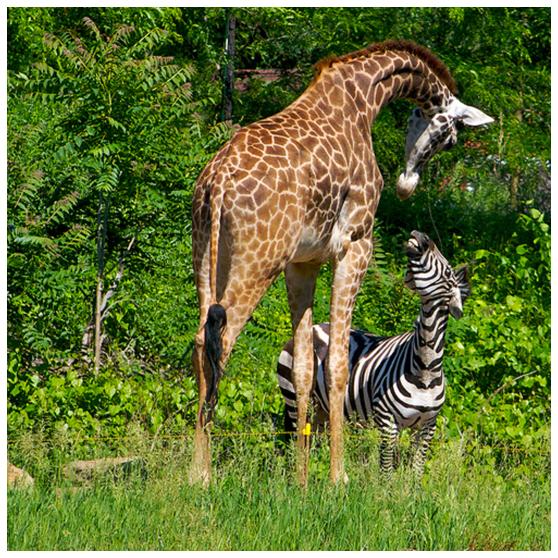

In [9]:
imShow('data/giraffe.jpg')

- **Option 1** : Download pre-trained weight 

In [ ]:
# Not necessary cell
# Get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

- **Option 2** : Upload pre-trained weight from local computer to **daknet** directory (it will be sync to your Google Drive)
  - [coco_yolov3-tiny.weights](https://drive.google.com/file/d/1ylp6mJXq3-DiEExkUpY7OYIYMZS28Vxp/view?usp=sharing)

In [12]:
!ls /darknet_drive

backup			  darknet   obj.names	train.txt
bin			  img	    test.txt	yolov3-tiny.cfg
coco_yolov3-tiny.weights  obj.data  train.list	yolov3-tiny.conv.11


In [13]:
!ls /darknet_drive/coco_yolov3-tiny.weights

/darknet_drive/coco_yolov3-tiny.weights


In [19]:
!ls cfg/

9k.labels				    resnext152-32x4d.cfg
9k.names				    rnn.cfg
9k.tree					    rnn.train.cfg
alexnet.cfg				    strided.cfg
cd53paspp-gamma.cfg			    t1.test.cfg
cifar.cfg				    tiny.cfg
cifar.test.cfg				    tiny-yolo.cfg
coco9k.map				    tiny-yolo-voc.cfg
coco.data				    tiny-yolo_xnor.cfg
coco.names				    vgg-16.cfg
combine9k.data				    vgg-conv.cfg
crnn.train.cfg				    voc.data
csdarknet53-omega.cfg			    writing.cfg
csresnext50-panet-spp.cfg		    yolo.2.0.cfg
csresnext50-panet-spp-original-optimal.cfg  yolo9000.cfg
darknet19_448.cfg			    yolo.cfg
darknet19.cfg				    yolov1
darknet53_448_xnor.cfg			    yolov2.cfg
darknet53.cfg				    yolov2-tiny.cfg
darknet.cfg				    yolov2-tiny-voc.cfg
densenet201.cfg				    yolov2-voc.cfg
efficientnet_b0.cfg			    yolov3_5l.cfg
efficientnet-lite3.cfg			    yolov3.cfg
enet-coco.cfg				    yolov3.coco-giou-12.cfg
extraction22k.cfg			    yolov3-openimages.cfg
extraction.cfg				    yolov3-spp.cfg
extraction.conv.cfg			    yolov3-tiny_3l.cfg
G

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
  10 con

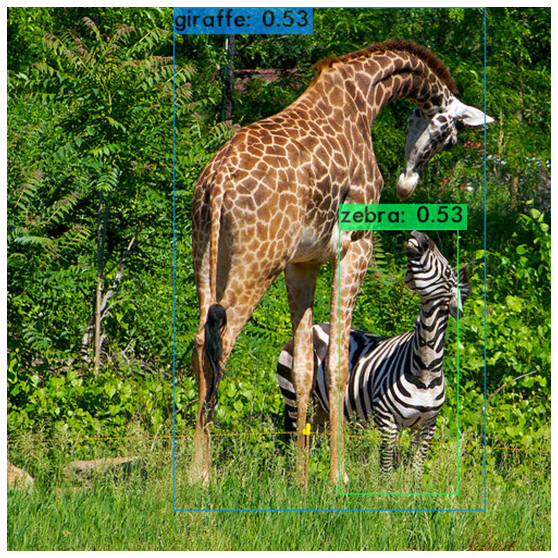

In [18]:
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3-tiny.cfg /darknet_drive/coco_yolov3-tiny.weights data/giraffe.jpg -dont-show

# Show the result using the helper imgShow()
imShow('predictions.jpg')

# PART 2. Training YOLO




![Yolov3 configuration files cheat sheet.jpg](http://blog.ibanyez.info/download/B20190410T000000072.png)

You can download the cheat sheet [here](http://blog.ibanyez.info/download/B20190410T000000072.png)



#### Download files :
  - [yolov3-tiny.cfg](https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3-tiny.cfg)
  - [yolov3-tiny.conv.11](https://drive.google.com/file/d/18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf/view)
  -

#### Create Files & Directory on **darknet** directory:
  - Create files `obj.names`, with this content,
  ```
  license plate
  ```  
  - Create files `obj.data`, with this content,
  ```
classes = 1
names = /darknet_drive/obj.names
train = /darknet_drive/train.txt
valid = /darknet_drive/test.txt
backup = /darknet_drive/backup/
  ```
  - Create Directory `backup/`
  - Put `yolov3-tiny.cfg` and `yolov3-tiny.conv.11` into **darknet** directory.
  - Put images dataset & annotated files into **darknet/img** directory. You need to create the **img/** first.

- Create `train.txt` & `test.txt`

In [21]:
!find /darknet_drive/img/*.jpg > /darknet_drive/train.txt
!find /darknet_drive/img/*.jpg > /darknet_drive/test.txt

### Train Model

In [ ]:
!./darknet detector train /darknet_drive/obj.data /darknet_drive/yolov3-tiny.cfg /darknet_drive/yolov3-tiny.conv.11 -dont_show 

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.000000, GIOU: 0.000000), Class: -nan, Obj: -nan, No Obj: -nan, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = nan, iou_loss = nan, total_loss = nan 
 total_bbox = 687, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: -nan, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = nan, iou_loss = nan, total_loss = nan 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.000000, GIOU: 0.000000), Class: -nan, Obj: -nan, No Obj: -nan, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = nan, iou_loss = nan, total_loss = nan 
 total_bbox = 688, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: -nan, .5R: 0.000000, .75R: 0

## PERFORMANCE TIPS & TRICKS

* **Speed up load times of the runtime:** When everything is checked that works, you can remove cells or comment unnecessary lines of code to make your loading time lower on every run. 

* **How to keep your notebook alive for more time?:** Keep you browser with your notebook open. If you close your browser, your notebook will reach the iddle time and will be removed from Colab cloud Service. (90 minutes)
  
* **Re-run your training after reaching the limitation time for Colab runtimes (12 hours):** 
  * Open a new notebook or reconnect the current one.
  * Comment the cell above and uncomment the cell below.
  * In your local computer, copy the file **backup/yolov3_last.weights** to your local computer **weights/** folder. 
  * Execute Run all in the **> menu > Runtime > Run All**
  * _The copy step is not absolutely necessary, but I like to keep a copy of the last training session and not overwrite this file on next trainings._

In [1]:
# Start training at the point where the last runtime finished
!./darknet detector train /darknet_drive/obj.data /darknet_drive/yolov3-tiny.cfg /darknet_drive/backup/yolov3-tiny_last.weights -dont_show 

/bin/bash: ./darknet: No such file or directory


## TROUBLESHOOTING 
The main problems you can face if your model throw an error is:

* Images or files not found. Check the **Yolov3 cheat sheet** image above and check that everything is ok. 
* If have you configured wrongly your **filters** and **classes** in the **yolov3.cfg**. Check the **Yolov3 cheet sheet** above.
* You can face some out of memory or library errors mainly for the lack of some the pre-requisits. In this case, check the versions of the current libraries installed on your Colab VM. You can find more information in the first steps of this notebook.
* **Batch** and **subdivisions** parameters on your **yolov3.cfg** can affect to the memory allocation as well. Refer to the original repo [Here]() for further details.
